---
title: "PCA using Singular Value Decomposition"
description: "PCA Singlular Value Decomposition"
author: "Eric Peña"
date: 2020-07-04T00:00:00-00:00
type: technical_note
draft: false
---

In another article, Principal Component Analysis was performed using Eigenvalue Decomposition. In this article we take a different approach: Single Value Decomposition. The general idea is that for any matrix we may perform Single Value Decomposition - this is guaranteed. It is a powerful tool that is used in many fields. On the other hand, the Eigenvalue Decomposition does not always exist. Eigenvalue Decomposition can only be done on square, full-rank, positive semi-definite matricies.


The general formula for Single Value Decomposition:

$$\Sigma = U \Lambda V^*$$

* Remember that $V^* = V^T = V^{-1}$ for Real Unitary matrices

* If we had performed SVD on the covariance of the original data, $X_c$, then we will have essentially performed the same Eigenvalue decomposition as before. Therefore, we will perform SVD on the actual input matrix $X_c$ itself. This matrix need not be square nor linearly independent for SVD to help us here.

* A general note about `np.linalg.svd(...)` is that the $V$ that it returns, the rotation matrix of the output space, is actually $V^T$

## We must start with some preliminary data generation

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
%matplotlib inline
np.random.seed(44)
from mpl_toolkits.mplot3d import Axes3D

Here, I generate data according to a Normal Bivariate Distribution described below:

$$X ~ N(\mu, \Sigma)\ \ \ \ \ \ \ \ \ \Sigma = \begin{bmatrix}
1 & 3\\\\
3 & 10
\end{bmatrix}$$

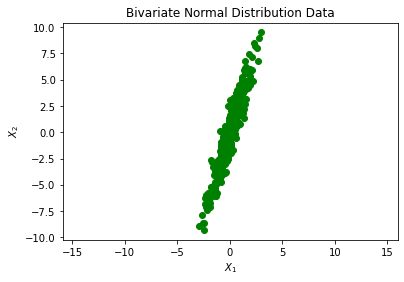

In [3]:
mean = [0,0]
cov = [[1, 3], [3, 10]]
X = np.random.multivariate_normal(mean, cov, 500)
plt.plot(X[:,0], X[:,1], 'go')
plt.title('Bivariate Normal Distribution Data')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.axis('equal')
plt.show()

Next, I estimate the covariance matrix and compare it with $\Sigma$. The way to do this is listed in the 3 steps below:

1. Remove the means from each data point in $X$: $X_c = (X - \bar X)$
2. Calculate: $X_c^T X_c$
3. Divide by the number of degrees of freedom: $(N-1)$

In [5]:
mx = np.mean(X, axis=0)
Xc = X - mx
C = (Xc.T@Xc) / (Xc[:,0].size - 1)
C

array([[ 0.98999791,  3.01642667],
       [ 3.01642667, 10.21045548]])

We can see that the computed covariance matrix is quite similar to the original covariance. The basic idea is that `cov` $\approx$ `C`.

Now, I will use the `svd` function from NumPy:

In [6]:
U, E, VT = np.linalg.svd(C, full_matrices=False)
print(f'U: Rotation of the input space\n{U}\n')
print(f'E: Scaling in the output space\n{E}\n')
print(f'VT: Rotation of the output space\n{VT}\n')

U: Rotation of the input space
[[-0.28565762 -0.95833174]
 [-0.95833174  0.28565762]]

E: Scaling in the output space
[11.10958594  0.09086745]

VT: Rotation of the output space
[[-0.28565762 -0.95833174]
 [-0.95833174  0.28565762]]



There are a few importnat points I should mention:

* $U$ and $V$ are both orthonormal matrices (assuming $\Sigma$ is real)

* The columns of $V$ and $U$ are the Eigenvectors of $X_c^T X_c$ and $X_c X_c^T$, respectively.

* We can show what the data looks like in the new orthogonal directions

* Using the formula is $Z_k = X V_k$

Now, let's plot the data in the new bases:

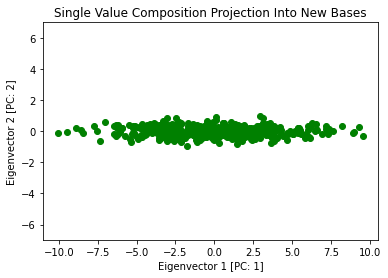

In [7]:
SZ = Xc @ VT.T
plt.plot(SZ[:,0], SZ[:,1],'go')
plt.title('Single Value Composition Projection Into New Bases')
plt.xlabel('Eigenvector 1 [PC: 1]')
plt.ylabel('Eigenvector 2 [PC: 2]')
plt.axis('equal')
plt.show()

Next we may see if this transformation preserves the variance of the original data

The general formula for Single Value Decomposition:
$$\Sigma = U \Lambda V^{*}$$

Since $\Lambda$ is the diagonal matrix from decomposing $X_c$, the trace of this matrix (sum of $\Lambda_{ii}$) is the following:
$$Tr(\Lambda) = \frac{d_1^2}{N-1} + \frac{d_2^2}{N-1} + \cdots + \frac{d_p^2}{N-1} = \sigma^2_{Z_1} + \sigma^2_{Z_2} + \cdots + \sigma^2_{Z_p}  = Var(Z)$$

But in this case, the $\frac{d_i}{N - 1} = \lambda_i$ since SVD and Eigenvalue Decomposition is the same when done on the covariance matrix.

In [9]:
xVariance = np.var(X[:,0]) + np.var(X[:,1])
sVariance = np.sum(E)
print(f'Variance in newly found orthogonal space: {sVariance}')
print(f'Variance in original orthogonal space: {xVariance}')

Variance in newly found orthogonal space: 11.200453390218739
Variance in original orthogonal space: 11.178052483438304


These values are very close to one another therefore variance (information) is preserved.

## More Features!

We typically have more features that we're dealing with so let's introduce this into what we're doing.

In [14]:
N, p = 5000, 10
meanNP = [0 for _ in range(p)]

Start with randomly creating a covariance matrix

In [17]:
covNP = [np.round(np.random.random(p)) for _ in range(p)]
covNP = np.array(covNP)
covNP = (covNP.T @ covNP)
np.fill_diagonal(covNP, 1)
covNP

array([[1., 2., 2., 5., 3., 2., 3., 2., 4., 4.],
       [2., 1., 2., 5., 4., 1., 2., 1., 5., 5.],
       [2., 2., 1., 4., 3., 1., 1., 1., 3., 3.],
       [5., 5., 4., 1., 7., 5., 4., 3., 8., 7.],
       [3., 4., 3., 7., 1., 4., 3., 3., 5., 5.],
       [2., 1., 1., 5., 4., 1., 2., 2., 3., 2.],
       [3., 2., 1., 4., 3., 2., 1., 1., 4., 2.],
       [2., 1., 1., 3., 3., 2., 1., 1., 1., 2.],
       [4., 5., 3., 8., 5., 3., 4., 1., 1., 6.],
       [4., 5., 3., 7., 5., 2., 2., 2., 6., 1.]])

In [18]:
min_eig = np.min(np.real(np.linalg.eigvals(covNP)))
if min_eig < 0:
     covNP -= 10*min_eig * np.eye(*covNP.shape)

Create $X_{N \times p}$ input matrix with $N = 5000$ and $p = 10$ | Sample from the same Bivariate Normal Distribution

In [19]:
XNP = np.random.multivariate_normal(meanNP, covNP, N)

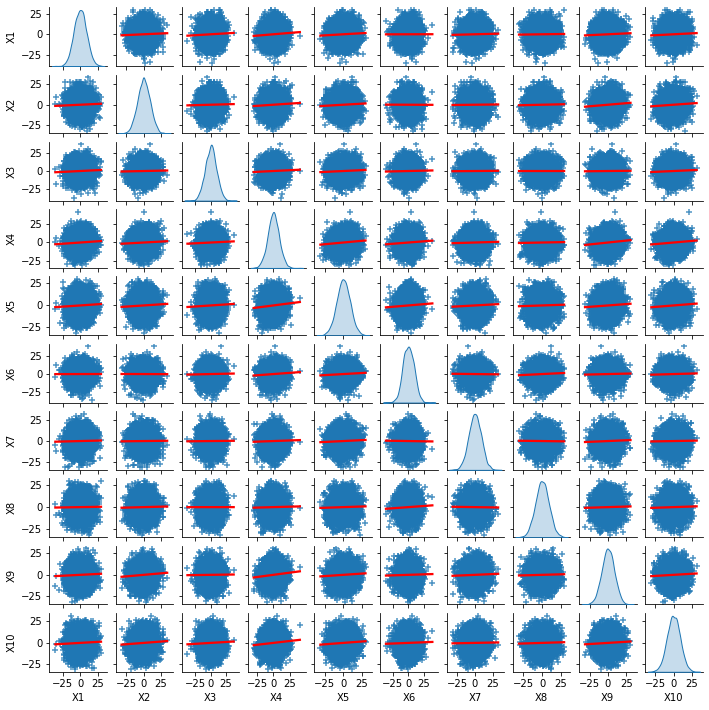

In [21]:
def show_pairplot():
    XNP_df = pd.DataFrame(data=XNP, columns=['X' + str(i) for i in range(1,p + 1)])
    sns.pairplot(XNP_df,
             diag_kind = 'kde',
             height = 1,
             palette="husl",
             kind="reg", plot_kws={'line_kws':{'color':'red'}},
             markers="+")
show_pairplot()

Next we will:

1. Subtract the mean from the input matrix
2. Calculate the covariance matrix

In [22]:
mxNP = np.mean(XNP, axis=0)
XcNP = XNP - mxNP
CNP = XcNP.T @ XcNP / (XcNP[:,0].size - 1)

Now we may show the calculated covariance matrix:

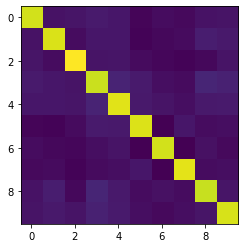

In [25]:
plt.imshow(CNP);

We can take a look at the differences in covariances between the one used for data generation and the one from simulated data.

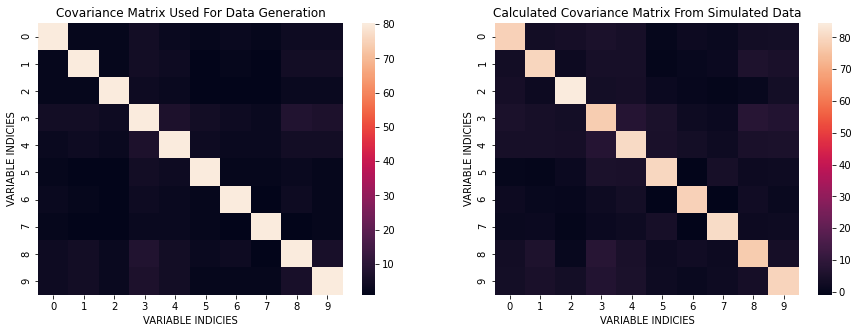

In [27]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.heatmap(covNP);
plt.title('Covariance Matrix Used For Data Generation');
plt.xlabel('VARIABLE INDICIES')
plt.ylabel('VARIABLE INDICIES')
plt.subplot(122)
sns.heatmap(CNP);
plt.title('Calculated Covariance Matrix From Simulated Data');
plt.xlabel('VARIABLE INDICIES')
plt.ylabel('VARIABLE INDICIES')
plt.show()

Here, I perform **SVD** on this problem:

In [28]:
UNP, ENP, VTNP = np.linalg.svd(XcNP, full_matrices = False)

In [29]:
print(f'U: Rotation of the input space\n{UNP}\n')
print(f'E: Scaling in the output space\n{ENP}\n')
print(f'VT: Rotation of the output space\n{VTNP}\n')

U: Rotation of the input space
[[ 0.00063402 -0.00223972 -0.00512473 ... -0.01283197 -0.00249885
   0.00729883]
 [ 0.00398954 -0.00015302  0.01754178 ...  0.02282558 -0.00582044
  -0.01374769]
 [-0.0113012  -0.02463393  0.00080511 ...  0.00957205 -0.00641299
  -0.0096895 ]
 ...
 [-0.01955479 -0.02007181  0.01777133 ...  0.02102236 -0.00992698
   0.01587713]
 [-0.01690699 -0.00056427 -0.0182975  ...  0.01105485 -0.01346963
  -0.01055169]
 [ 0.01078462  0.01053594  0.01148998 ... -0.00896266 -0.01786641
   0.00072838]]

E: Scaling in the output space
[740.25549159 650.23894313 645.07816186 630.69002383 620.78564169
 614.66865467 609.89320315 606.82283464 599.25632365 582.99093422]

VT: Rotation of the output space
[[-0.29282796 -0.30797533 -0.28041494 -0.43695612 -0.43217361 -0.23051754
  -0.14681501 -0.16859798 -0.34464154 -0.37572558]
 [ 0.22877855  0.08402528  0.48977653 -0.05238006 -0.04269272 -0.52141728
   0.25666469 -0.59697826 -0.03962057  0.02114617]
 [-0.02011072 -0.34199333  0

In [13]:
UNP, ENP, VTNP = np.linalg.svd(Xc, full_matrices = False)
# print(f'U: Rotation of the input space\n{UNP}\n')
print(f'E: Scaling in the output space\n{ENP}\n')
print(f'VT: Rotation of the output space\n{VTNP}\n')

E: Scaling in the output space
[74.4559157   6.73371059]

VT: Rotation of the output space
[[ 0.28565762  0.95833174]
 [ 0.95833174 -0.28565762]]



It appears that since there are many more dimensions, the variance explain is spread throughout the different orthogonal components. The question becomes, is the amount of varation in all these components equal to the amount of variation from the original dataset. To answer this we will sum up all the diagonal entries from the $\Lambda$ matrix like previously discussed. The important formula we will use is the following:

$$Tr(\Lambda) = \frac{d_1^2}{N} + \frac{d_2^2}{N} + \cdots + \frac{d_p^2}{N} = \sigma^2_{Z_1} + \sigma^2_{Z_2} + \cdots + \sigma^2_{Z_p}  = Var(Z)$$

#### Amount of Variation From SVD Components:

In [30]:
varNP = np.sum(np.square(ENP) / N)

#### Amount of Variation From The Original Simulated Data

In [31]:
varXcNP = np.sum([np.var(XcNP[:,i]) for i in range(p)])

#### Comparison Of The Two Values Above

In [32]:
print(f'Variance in newly found orthogonal space: {varNP}')
print(f'Variance in original orthogonal space: {varXcNP}')

Variance in newly found orthogonal space: 797.4134455431736
Variance in original orthogonal space: 797.413445543174


* As we can see above, the amount of variation explained is still preserved even when switching to a new orthogonal basis

* Now let's look into how much variation is explained by each variable

In [33]:
tvar = varNP
vlist = (np.square(ENP)/N)
cumvar = np.cumsum(vlist)

In [34]:
print(vlist)
print(cumvar)
print(np.sum(vlist / tvar))

[109.59563857  84.56213663  83.22516698  79.55398123  77.07496258
  75.56351101  74.39394385  73.64679053  71.82162829  67.97568588]
[109.59563857 194.1577752  277.38294218 356.93692341 434.011886
 509.575397   583.96934085 657.61613138 729.43775967 797.41344554]
1.0


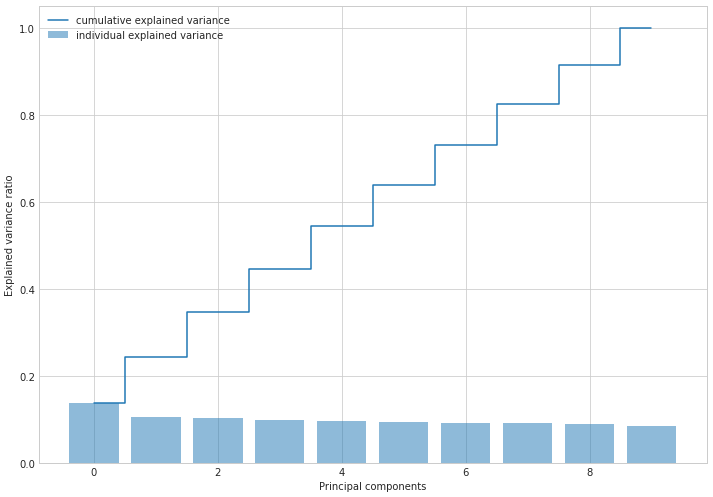

In [35]:
plt.figure(figsize=(10, 7))
with plt.style.context('seaborn-whitegrid'):
    plt.bar(range(p), vlist / tvar, alpha=0.5, align='center', label='individual explained variance')
    plt.step(range(p), cumvar / tvar, where='mid', label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

We can even check if this decomposition was successful. Let's reconstruct our original data by multiplying all three matrices we obtain from the decomposition.

$$U \Lambda V^T \rightarrow X$$

In [36]:
ENPmatrix = np.diag(ENP)
XNPconstructed = UNP @ ENPmatrix @ VTNP
frobenius = np.linalg.norm(XcNP - XNPconstructed, 'fro')
print(f'Frobenius Norm value between constructed Xc from the decomposition and the original dataset: {frobenius}')

Frobenius Norm value between constructed Xc from the decomposition and the original dataset: 4.281900349435277e-12


A Frobenius Norm value this low shows that the decomposition was performed correctly

$$||A||_F = \sqrt{Tr\left(AA^H\right)}$$
<center>where $A^H$ is the conjugate transpose of $A$.</center>

## We did it!